In [22]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import os
import seaborn as sns
from DataLoader import DataLoader
from Analyser import VelocityAutocorrelationAnalyser

sns.set_theme()
sns.set_context("paper")
sns.set(rc={"xtick.bottom": True, "ytick.left": True})
palette = sns.color_palette('pastel')

In [3]:
def list_subfolders(directory):
    subfolders = []
    for root, dirs, files in os.walk(directory):
        for dir in dirs:
            subfolders.append(str(dir))
    return subfolders

data_dict = {}
subfolders = list_subfolders("./v_60/")
print(subfolders)
for subfolder in subfolders:
    data_dict[str(subfolder)] = DataLoader("./v_60/" + subfolder)
    data_dict[str(subfolder)].load()

['20', '1', '10', '15', '2', '5']


$$
P\left( V - \frac{Nv}{2} \right) = Nk_B T \ \Rightarrow \ b \equiv \frac{Nv}{2} = V - \frac{Nk_B T}{P}
$$

In [4]:
kb = 1.38064852e-23
b_list = []
r_list = []

for rad in data_dict.keys():
    dl = data_dict[str(rad)]
    V = np.pi * (dl.sim_spec['containerRadius'] ** 2)
    N = dl.sim_spec['numOfBalls']
    b = V - ((dl.macro_dict['t_equipartition'][-100:] * kb * N) / (dl.macro_dict['pressure'][-100:]))
    b_list.append([np.mean(b), np.std(b, ddof=1)])
    r_list.append(dl.sim_spec['ballRadius'])

b_list = np.array(b_list)
r_list = np.array(r_list)
r_list

array([20.,  1., 10., 15.,  2.,  5.])

[2.57598945e+03 1.73474509e+00]
87.62958744231224 0.011739644633328442


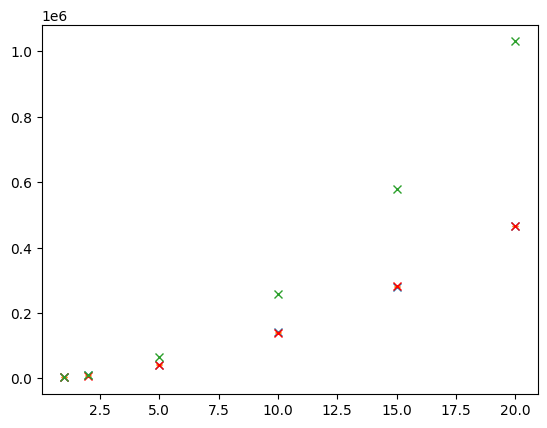

In [5]:
fig, ax = plt.subplots()
ax.plot(r_list, b_list[:, 0], 'x')
# ax.plot(rs, rs * ((b_list[1][0] - b_list[0][0])/(rs[1] - rs[0])) , 'rx')
ax.errorbar(x=r_list, y=b_list[:, 0],xerr=None,  yerr=b_list[:, 1], capsize=2, linestyle='none')
#ax.set_xlim(0, 16000)

def fn(x, k, phi):
    return k * x ** phi

params, garb = curve_fit(fn, r_list, b_list[:, 0], sigma=b_list[:, 1])
print(params)
print(np.sqrt(garb[0][0]), np.sqrt(garb[1][1]))
ax.plot(r_list, fn(r_list, *params), 'x', color='red')
ax.plot(r_list, params[0]*r_list**2, 'x')

In [6]:
kb = 1.38064852e-23
lim = -2000
z_list = []
alpha_list = []
pf_list = []

for rad in data_dict.keys():
    dl = data_dict[rad]
    V = np.pi * (dl.sim_spec['containerRadius'] ** 2)
    N = dl.sim_spec['numOfBalls']
    P = dl.macro_dict['pressure'][lim:]
    T = dl.macro_dict['t_equipartition'][lim:]
    z = (P*V)/(N*kb*T)
    z_list.append([np.mean(z), np.std(z, ddof=1)])
    V0 = (dl.sim_spec['ballRadius'] ** 2) * np.pi * dl.sim_spec['numOfBalls']
    alpha = (V - V0)/V0
    alpha_list.append(alpha)
    pf_list.append(V0/V)

z_list = np.array(z_list)
alpha_list = np.array(alpha_list)
pf_list = np.array(pf_list)

1.8989361040418258 +/- 0.04107857084530324


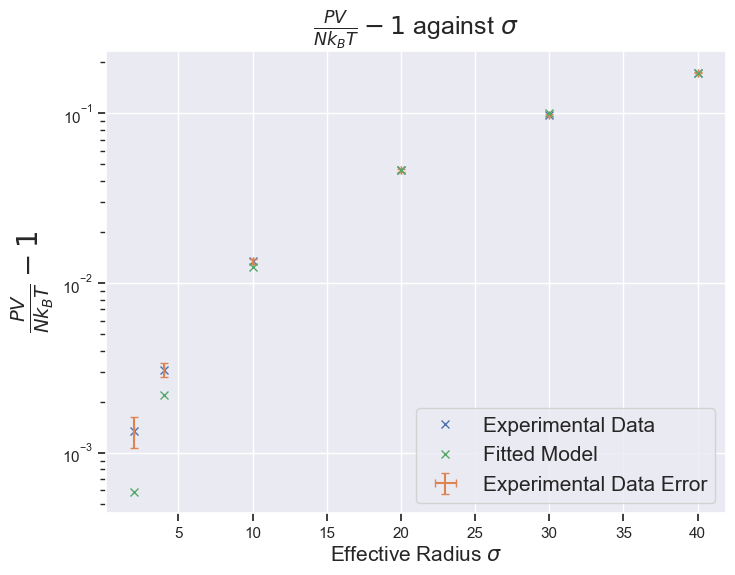

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))
y_list =  r_list * 2
ax.plot(y_list , z_list[:, 0] - 1, 'x', label='Experimental Data')
ax.errorbar(x = y_list, y = z_list[:, 0] - 1, yerr = z_list[:, 1], xerr = 0, linestyle = 'none', capsize=3, label='Experimental Data Error')

def fn(x, k, phi):
    return k * x ** phi

params, garb = curve_fit(fn, y_list, z_list[:, 0] - 1, sigma=b_list[:, 1])
print(params[1], '+/-', np.sqrt(garb[1][1]))

ax.plot(y_list, fn(y_list, *params), 'x', label='Fitted Model')
ax.set_yscale('log')

ax.set_xlabel(r'Effective Radius $\sigma$', fontsize=15)
ax.set_ylabel(r'$\frac{PV}{Nk_B T} - 1$', fontsize=20)
ax.set_title(r'$\frac{PV}{Nk_B T} - 1$ against $\sigma$', fontsize=18)

ax.legend(loc='lower right', fontsize=15)
fig.savefig('./result1.png')

[5.95238095e+07 1.48809524e+01 5.95238095e+03 5.95238095e+01
 5.95238095e+05]


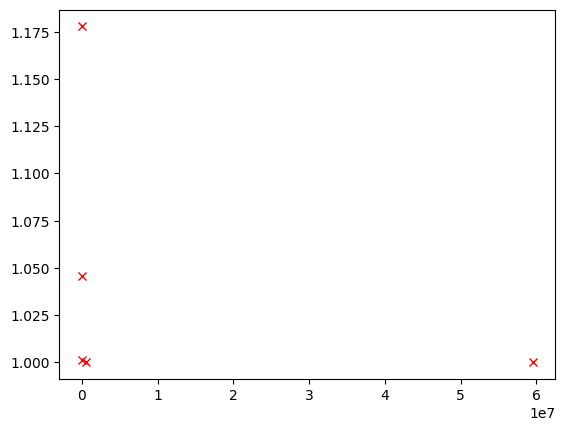

In [388]:
print(1/pf_list)
fig, ax = plt.subplots()
ax.plot(1/pf_list, z_list[:, 0], 'rx')

  0%|          | 0/49999 [00:00<?, ?it/s]

<Axes: >

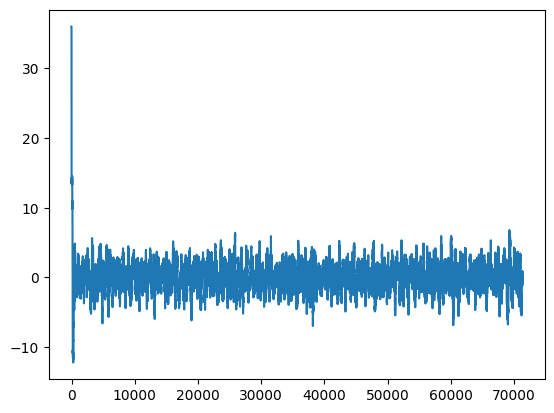

In [372]:
ves = VelocityAutocorrelationAnalyser(data_dict['1'])
ves.plot_velocity_autocorrelation()

In [49]:
(2 - 1.94)/0.2

0.30000000000000027